### Load and Explore the Dataset

In [21]:
import pandas as pd

data = pd.read_csv('/kaggle/input/dataset1/diabetes_prediction_dataset.csv')


In [40]:
data.head(15)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
5,0,20.0,0,0,4,27.32,6.6,85,0
6,0,44.0,0,0,4,19.31,6.5,200,1
7,0,79.0,0,0,0,23.86,5.7,85,0
8,1,42.0,0,0,4,33.64,4.8,145,0
9,0,32.0,0,0,4,27.32,5.0,100,0


In [23]:
data.shape

(100000, 9)

In [24]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


### Extract Numerical and Categorical Columns


In [25]:
# Extraire les colonnes numériques
colonnes_numeriques = data.select_dtypes(include=['int64', 'float64']).columns
print("Colonnes numériques :", colonnes_numeriques)
df_numerique = data[colonnes_numeriques]

Colonnes numériques : Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')


In [26]:
# Extraire les colonnes catégorielles
colonnes_categorielles = data.select_dtypes(include=['object']).columns
print("Colonnes catégorielles :", colonnes_categorielles)
df_categoriel = data[colonnes_categorielles]

Colonnes catégorielles : Index(['gender', 'smoking_history'], dtype='object')


### Dataset Statistical Summary

In [27]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


### Data Visualization

<Axes: xlabel='gender', ylabel='count'>

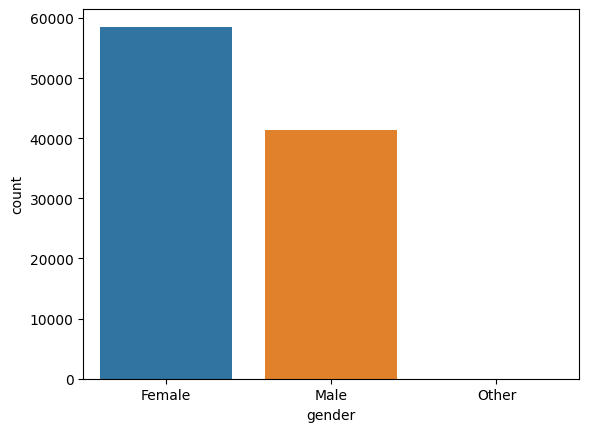

In [29]:
# Countplot for Gender
import seaborn as sns
sns.countplot(x='gender',data=data)

<Axes: xlabel='hypertension', ylabel='count'>

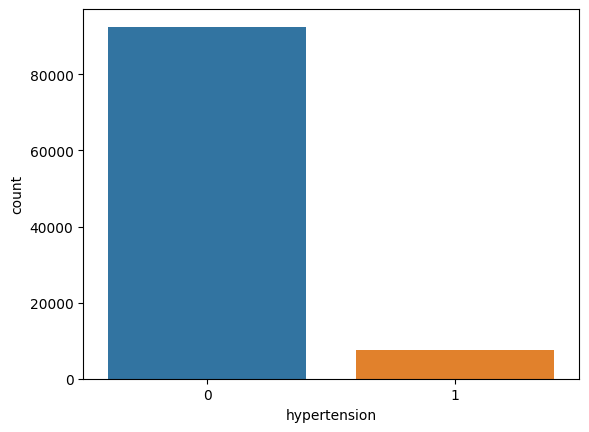

In [30]:
# Countplot for Hypertension
import seaborn as sns
sns.countplot(x='hypertension',data=data)

<Axes: xlabel='diabetes', ylabel='count'>

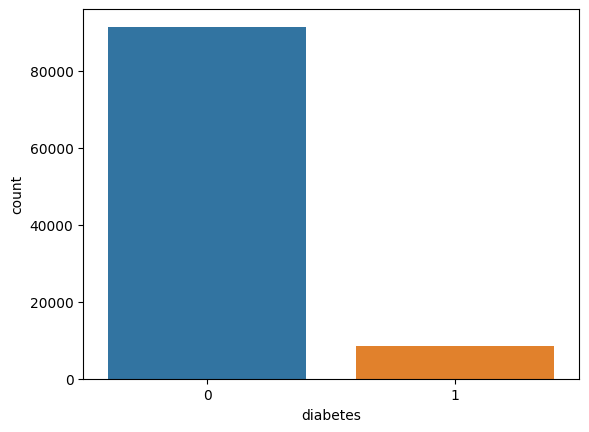

In [31]:
# Countplot for Diabetes
import seaborn as sns
sns.countplot(x='diabetes',data=data)

### Encode Categorical Variables

In [36]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder() 
data['gender'] = label_encoder.fit_transform(data['gender']) 
data['smoking_history'] = label_encoder.fit_transform(data['smoking_history']) 



In [37]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


### Correlation Matrix Visualization

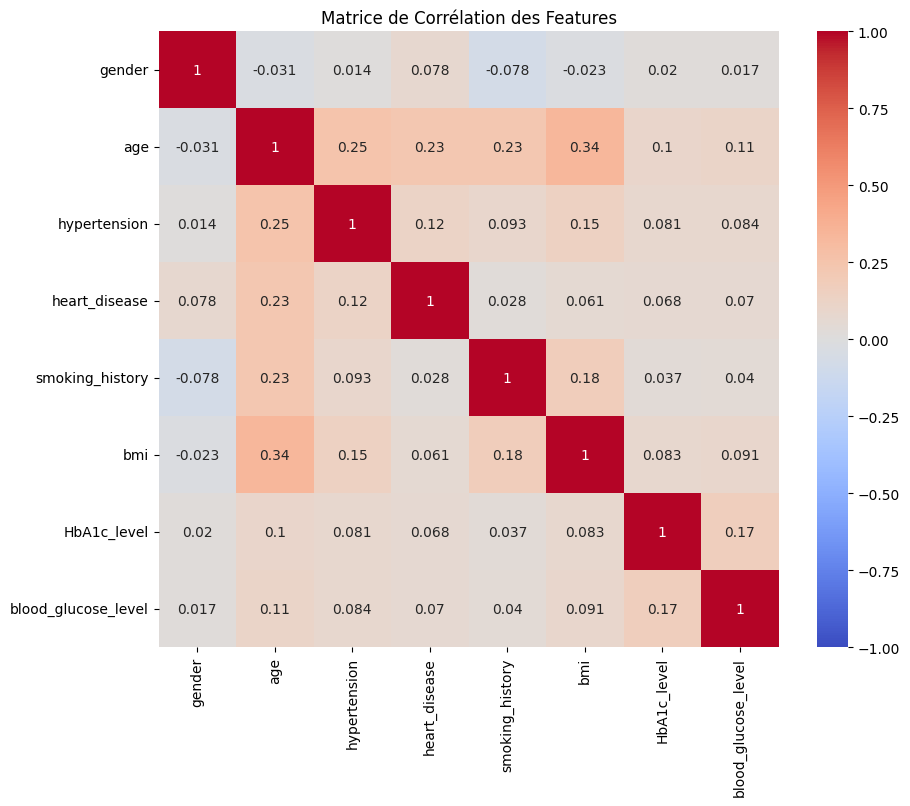

In [38]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calculer la matrice de corrélation
correlation_matrix = data[['gender','age','hypertension','heart_disease','smoking_history','bmi','HbA1c_level','blood_glucose_level']].corr()

# Visualiser la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de Corrélation des Features')
plt.show()



### Split the Data into Training and Testing Sets

In [46]:
x=data.drop('diabetes',axis=1)
y=data['diabetes']


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Train and Evaluate Logistic Regression Model

In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)


LogisticRegression(solver='liblinear')

In [51]:
y_pred = model.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred) # le pourcentage des clients prédites correctement 
conf_matrix = confusion_matrix(y_test, y_pred) 
class_report = classification_report(y_test, y_pred) 
print("Accuracy:", accuracy) 
print("Confusion Matrix:\n", conf_matrix) 
print("Classification Report:\n", class_report)


Accuracy: 0.95895
Confusion Matrix:
 [[18152   140]
 [  681  1027]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.88      0.60      0.71      1708

    accuracy                           0.96     20000
   macro avg       0.92      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



 ### Train and Evaluate Support Vector Machine (SVM) Model

In [56]:
from sklearn.svm import SVC
# Create an SVM classifier with a linear kernel
svm_model = SVC(kernel='linear')

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9586
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.89      0.59      0.71      1708

    accuracy                           0.96     20000
   macro avg       0.93      0.79      0.84     20000
weighted avg       0.96      0.96      0.95     20000



### Train and Evaluate Gradient Boosting Classifier

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
# Create a Gradient Boosting Classifier
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbm_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [59]:
# Make predictions on the test set
y_pred = gbm_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.97245
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       0.99      0.69      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000

